# Data Wrangling

## Mengimpor Modul Python

In [ ]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.svm import SVC

## Mengimpor Data di Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Memuat Data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data_sample.csv")
df

,Menjadi marah karena hal-hal sepele,Mulut terasa kering,Tidak dapat melihat hal positif dari suatu kejadian,"Merasakan gangguan dalam bernafas (nafas cepat, sulit bernafas, sesak)",Merasa sepertinya tidak kuat lagi melakukan kegiatan,Cenderung bereaksi berlebihan pada situasi lingkungan,Ada kelemahan pada anggota tubuh,Ada kesulitan untuk rileks atau bersantai,Cemas berlebihan dalam suatu situasi namun lega jika situasi itu berakhir,Pesimis,...,Mudah gelisah,Merasa khawatir dengan situasi saat diri panik dan mempermalukan diri sendiri,Gemetar,Merasa sulit meningkatkan inisiatif dalam melakukan sesuatu,Skor_Depresi,Skor_Kecemasan,Skor_Stres,Kategori_Depresi,Kategori_Kecemasan,Kategori_Stres
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Normal,Normal,Normal
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,14,14,14,Sedang,Sedang,Normal
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,28,28,28,Sangat Berat,Sangat Berat,Berat
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,42,42,42,Sangat Berat,Sangat Berat,Sangat Berat
4,1,0,2,1,0,0,0,0,0,2,...,0,1,0,2,10,8,7,Ringan,Ringan,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,2,2,0,3,3,2,1,0,...,2,1,3,3,27,19,25,Berat,Berat,Sedang
4996,2,2,0,3,2,1,2,3,3,2,...,3,0,0,0,21,21,23,Berat,Sangat Berat,Sedang
4997,1,2,3,3,1,0,0,3,2,3,...,2,0,3,0,21,25,20,Berat,Sangat Berat,Sedang
4998,2,0,3,2,1,1,3,0,0,1,...,0,3,2,2,18,19,13,Sedang,Berat,Normal


# Pemrosesan Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 48 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Menjadi marah karena hal-hal sepele                                                              5000 non-null   int64 
 1   Mulut terasa kering                                                                              5000 non-null   int64 
 2   Tidak dapat melihat hal positif dari suatu kejadian                                              5000 non-null   int64 
 3   Merasakan gangguan dalam bernafas (nafas cepat, sulit bernafas, sesak)                           5000 non-null   int64 
 4   Merasa sepertinya tidak kuat lagi melakukan kegiatan                                             5000 non-null   int64 
 5   Cenderung ber

In [ ]:
df.isnull().sum()

,0
Menjadi marah karena hal-hal sepele,0
Mulut terasa kering,0
Tidak dapat melihat hal positif dari suatu kejadian,0
"Merasakan gangguan dalam bernafas (nafas cepat, sulit bernafas, sesak)",0
Merasa sepertinya tidak kuat lagi melakukan kegiatan,0
Cenderung bereaksi berlebihan pada situasi lingkungan,0
Ada kelemahan pada anggota tubuh,0
Ada kesulitan untuk rileks atau bersantai,0
Cemas berlebihan dalam suatu situasi namun lega jika situasi itu berakhir,0
Pesimis,0


In [ ]:
data= df.rename(columns = {
    "Menjadi marah karena hal-hal sepele": "DASS1",
    "Mulut terasa kering": "DASS2",
    "Tidak dapat melihat hal positif dari suatu kejadian": "DASS3",
    "Merasakan gangguan dalam bernafas (nafas cepat, sulit bernafas, sesak)": "DASS4",
    "Merasa sepertinya tidak kuat lagi melakukan kegiatan": "DASS5",
    "Cenderung bereaksi berlebihan pada situasi lingkungan": "DASS6",
    "Ada kelemahan pada anggota tubuh": "DASS7",
    "Ada kesulitan untuk rileks atau bersantai": "DASS8",
    "Cemas berlebihan dalam suatu situasi namun lega jika situasi itu berakhir": "DASS9",
    "Pesimis": "DASS10",
    "Mudah merasa kesal": "DASS11",
    "Merasa banyak menghabiskan energi karena cemas": "DASS12",
    "Merasa sedih atau depresi": "DASS13",
    "Tidak sabaran": "DASS14",
    "Merasa Kelelahan": "DASS15",
    "Kehilangan minat pada banyak hal (seperti makan, bergerak, sosialisasi, dll)": "DASS16",
    "Merasa diri tidak layak": "DASS17",
    "Mudah tersinggung": "DASS18",
    "Berkeringat tanpa pencetus yang jelas (misal: tangan berkeringat)": "DASS19",
    "Ketakutan tanpa alasan yang jelas": "DASS20",
    "Merasa hidup tidak berharga": "DASS21",
    "Sulit untuk beristirahat": "DASS22",
    "Kesulitan dalam menelan": "DASS23",
    "Tidak dapat menikmati hal yang sedang dilakukan": "DASS24",
    "Perubahan denyut jantung dan nadi tanpa alasan yang jelas (berdebar)": "DASS25",
    "Merasa hilang harapan dan putus asa": "DASS26",
    "Mudah marah": "DASS27",
    "Mudah panik": "DASS28",
    "Kesulitan untuk tenang setelah terjadi sesuatu yang mengganggu": "DASS29",
    "Takut diri terhambat oleh tugas-tugas yang tidak biasa dilakukan": "DASS30",
    "Sulit untuk antusias pada banyak hal": "DASS31",
    "Sulit mentoleransi gangguan-gangguan terhadap hal yang sedang dilakukan": "DASS32",
    "Berada pada keadaan atau situasi tegang": "DASS33",
    "Merasa tidak berharga": "DASS34",
    "Tidak dapat memaklumi hal apapun yang menghalangi untuk menyelesaikan hal yang sedang dilakukan": "DASS35",
    "Merasa Ketakutan": "DASS36",
    "Tidak ada harapan untuk masa depan": "DASS37",
    "Merasa hidup tidak berarti": "DASS38",
    "Mudah gelisah": "DASS39",
    "Merasa khawatir dengan situasi saat diri panik dan mempermalukan diri sendiri": "DASS40",
    "Gemetar": "DASS41",
    "Merasa sulit meningkatkan inisiatif dalam melakukan sesuatu": "DASS42"})

## Memberi Label

Memberi label pada pertanyaan-pertanyaan yang ditujukan untuk menentukan data depresi, kecemasan dan stres.

In [ ]:
DASS_keys = {'Depresi': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Kecemasan': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stres': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Depresi_keys = []
for i in DASS_keys["Depresi"]:
    Depresi_keys.append('DASS'+str(i))
Kecemasan_keys = []
for i in DASS_keys["Kecemasan"]:
    Kecemasan_keys.append('DASS'+str(i))
Stres_keys = []
for i in DASS_keys["Stres"]:
    Stres_keys.append('DASS'+str(i))

depresi_dataset= data.filter(Depresi_keys)
kecemasan_dataset = data.filter(Kecemasan_keys)
stres_dataset = data.filter(Stres_keys)

In [ ]:
data_depresi = depresi_dataset.copy()
data_kecemasan = kecemasan_dataset.copy()
data_stres = stres_dataset.copy()

In [ ]:
depresi_dataset

,DASS3,DASS5,DASS10,DASS13,DASS16,DASS17,DASS21,DASS24,DASS26,DASS31,DASS34,DASS37,DASS38,DASS42
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,2,0,2,0,0,0,0,1,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,2,1,2,2,3,1,2,3,3,3,3
4996,0,2,2,1,1,3,1,3,3,0,2,0,3,0
4997,3,1,3,2,3,2,1,0,3,1,0,2,0,0
4998,3,1,1,3,1,0,2,0,0,0,1,1,3,2


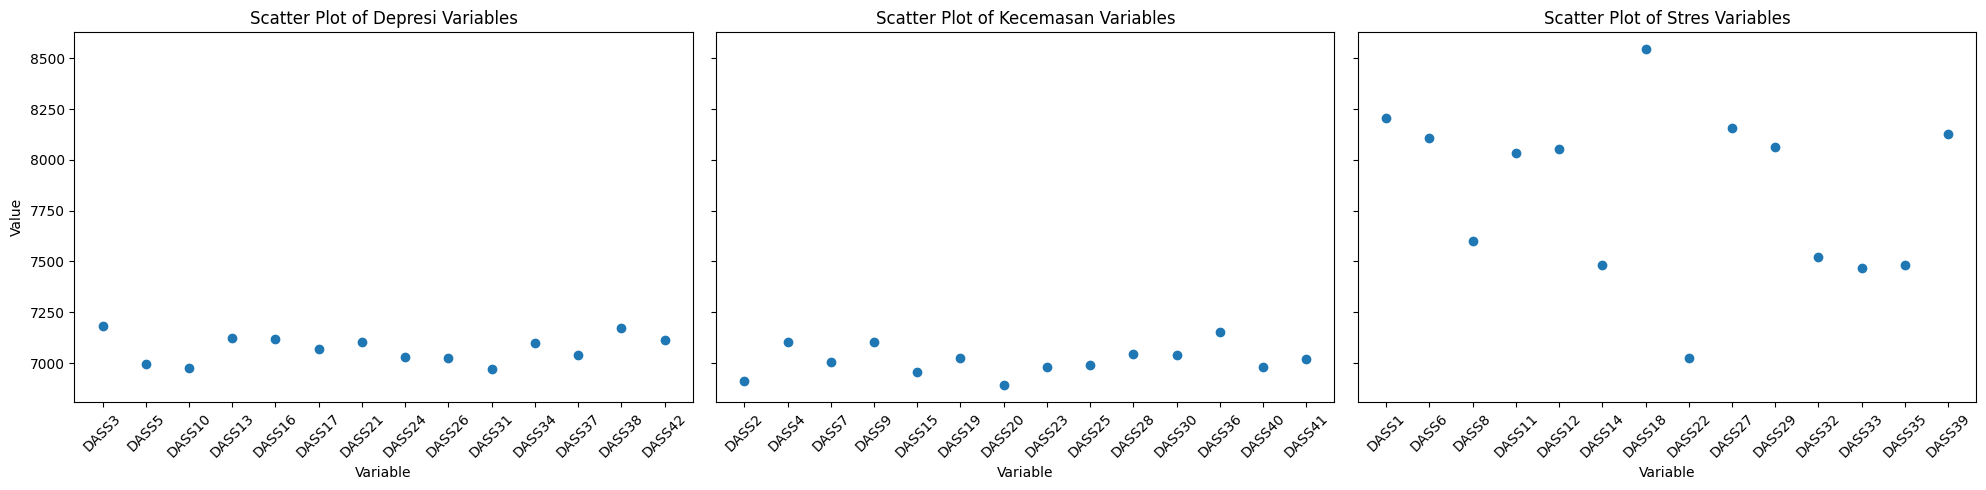

In [ ]:
import matplotlib.pyplot as plt

# Pastikan bahwa dataset berikut sudah ada:
# depresi_dataset, kecemasan_dataset, stres_dataset

# Buat Figure dan beberapa Axes
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

# Plot untuk Depresi
depresi_vars = depresi_dataset.columns  # Mengambil semua kolom dalam dataset depresi
axs[0].scatter(depresi_vars, depresi_dataset.sum())
axs[0].set_title('Scatter Plot of Depresi Variables')
axs[0].set_xlabel('Variable')
axs[0].set_ylabel('Value')
axs[0].tick_params(axis='x', rotation=45)

# Plot untuk Kecemasan
kecemasan_vars = kecemasan_dataset.columns  # Mengambil semua kolom dalam dataset kecemasan
axs[1].scatter(kecemasan_vars, kecemasan_dataset.sum())
axs[1].set_title('Scatter Plot of Kecemasan Variables')
axs[1].set_xlabel('Variable')
axs[1].tick_params(axis='x', rotation=45)

# Plot untuk Stres
stres_vars = stres_dataset.columns  # Mengambil semua kolom dalam dataset stres
axs[2].scatter(stres_vars, stres_dataset.sum())
axs[2].set_title('Scatter Plot of Stres Variables')
axs[2].set_xlabel('Variable')
axs[2].tick_params(axis='x', rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()


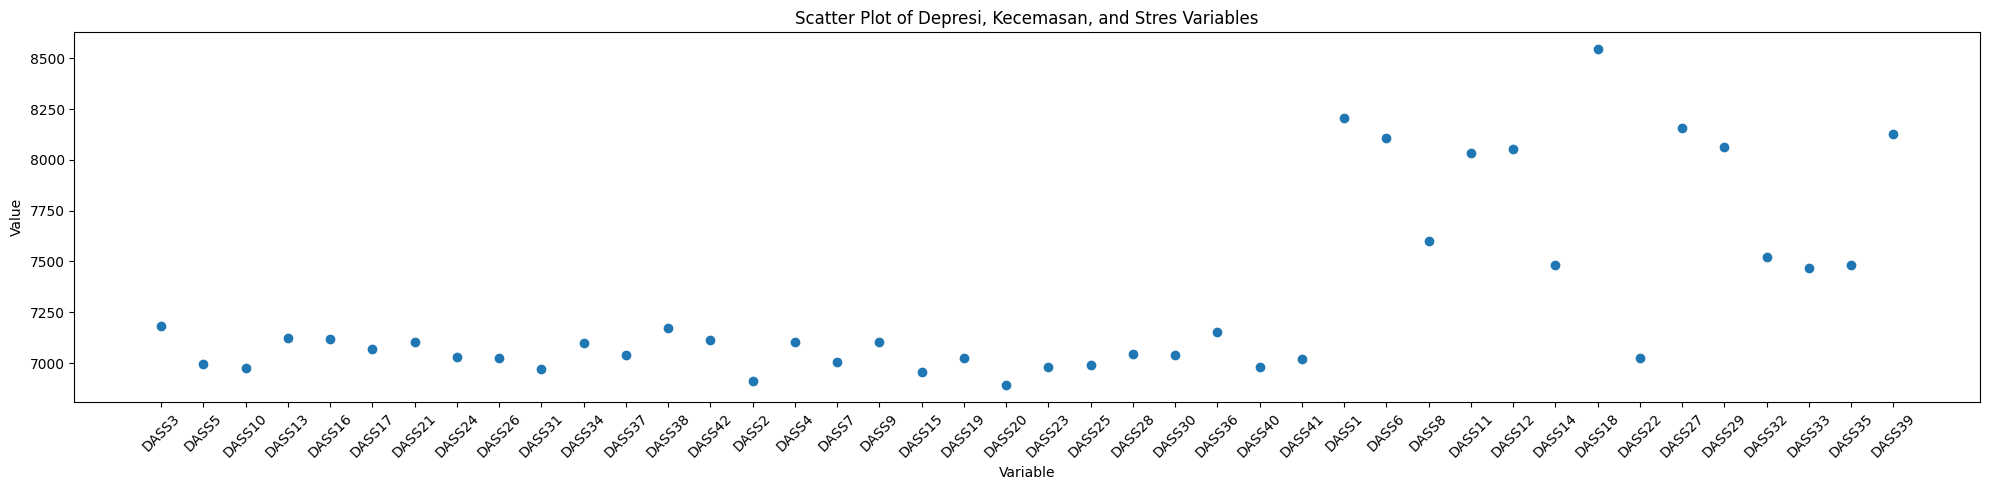

In [ ]:
import matplotlib.pyplot as plt

# Asumsikan depresi_dataset, kecemasan_dataset, stres_dataset sudah didefinisikan

# Gabungkan semua variabel dan sum dari setiap dataset
all_vars = list(depresi_dataset.columns) + list(kecemasan_dataset.columns) + list(stres_dataset.columns)
all_values = list(depresi_dataset.sum()) + list(kecemasan_dataset.sum()) + list(stres_dataset.sum())

# Buat scatter plot gabungan
plt.figure(figsize=(20, 5))
plt.scatter(all_vars, all_values)
plt.title('Scatter Plot of Depresi, Kecemasan, and Stres Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Putar label sumbu x agar lebih mudah dibaca

# Menampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
kecemasan_dataset

,DASS2,DASS4,DASS7,DASS9,DASS15,DASS19,DASS20,DASS23,DASS25,DASS28,DASS30,DASS36,DASS40,DASS41
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,0,1,0,0,1,1,1,0,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,2,3,1,0,1,0,3,0,2,0,2,1,3
4996,2,3,2,3,0,2,0,3,3,2,0,1,0,0
4997,2,3,0,2,3,3,0,3,1,0,2,3,0,3
4998,0,2,3,0,0,1,3,1,0,2,0,2,3,2


In [ ]:
stres_dataset

,DASS1,DASS6,DASS8,DASS11,DASS12,DASS14,DASS18,DASS22,DASS27,DASS29,DASS32,DASS33,DASS35,DASS39
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,0,0,1,1,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,3,2,2,2,3,2,0,3,3,1,0,2,2
4996,2,1,3,3,3,0,0,3,0,1,3,1,0,3
4997,1,0,3,1,0,1,2,1,0,3,3,1,2,2
4998,2,1,0,1,1,1,0,1,3,1,1,0,1,0


# Pemodelan Data

## Pembagian Data Training dan Data Testing

In [ ]:
depresi_Y = data['Kategori_Depresi']
depresi_X = data.drop(columns=['DASS1', 'DASS6', 'DASS8', 'DASS11', 'DASS12', 'DASS14', 'DASS18', 'DASS22', 'DASS27', 'DASS29', 'DASS32', 'DASS33', 'DASS35',
                               'DASS39','DASS2', 'DASS4', 'DASS7', 'DASS9', 'DASS15', 'DASS19', 'DASS20', 'DASS23', 'DASS25', 'DASS28', 'DASS30', 'DASS36',
                               'DASS40', 'DASS41','Kategori_Depresi','Kategori_Kecemasan','Kategori_Stres','Skor_Depresi','Skor_Kecemasan','Skor_Stres'])

In [ ]:
kecemasan_Y = data['Kategori_Kecemasan']
kecemasan_X = data.drop(columns=['DASS1', 'DASS6', 'DASS8', 'DASS11', 'DASS12', 'DASS14', 'DASS18', 'DASS22', 'DASS27', 'DASS29', 'DASS32', 'DASS33', 'DASS35',
                               'DASS39','DASS3', 'DASS5', 'DASS10', 'DASS13', 'DASS16', 'DASS17', 'DASS21', 'DASS24', 'DASS26', 'DASS31', 'DASS34', 'DASS37',
                                 'DASS38', 'DASS42','Kategori_Depresi','Kategori_Kecemasan','Kategori_Stres','Skor_Depresi','Skor_Kecemasan','Skor_Stres'])

In [ ]:
stres_Y = data['Kategori_Stres']
stres_X = data.drop(columns=['DASS3', 'DASS5', 'DASS10', 'DASS13', 'DASS16', 'DASS17', 'DASS21', 'DASS24', 'DASS26', 'DASS31', 'DASS34', 'DASS37',
                             'DASS38', 'DASS42', 'DASS2', 'DASS4', 'DASS7', 'DASS9', 'DASS15', 'DASS19', 'DASS20', 'DASS23', 'DASS25', 'DASS28', 'DASS30',
                             'DASS36', 'DASS40', 'DASS41','Kategori_Depresi','Kategori_Kecemasan','Kategori_Stres','Skor_Depresi','Skor_Kecemasan','Skor_Stres'])

In [ ]:
# Membagi data ke dalam set pelatihan dan pengujian untuk depresi
dp_X_train, dp_X_test, dp_y_train, dp_y_test = train_test_split(depresi_X, depresi_Y, test_size=0.2, random_state=42)

# Membagi data ke dalam set pelatihan dan pengujian untuk kecemasan
kc_X_train, kc_X_test, kc_y_train, kc_y_test = train_test_split(kecemasan_X, kecemasan_Y, test_size=0.2, random_state=42)

# Membagi data ke dalam set pelatihan dan pengujian untuk stres
ss_X_train, ss_X_test, ss_y_train, ss_y_test = train_test_split(stres_X, stres_Y, test_size=0.2, random_state=42)

## Modelling

In [ ]:
# Menentukan model
dp_model = SVC(kernel='rbf', C=100, gamma=0.001)
kc_model = SVC(kernel='rbf', C=100, gamma=0.001)
ss_model = SVC(kernel='rbf', C=100, gamma=0.001)

# Melatih Model
dp_model.fit(dp_X_train, dp_y_train)
kc_model.fit(kc_X_train, kc_y_train)
ss_model.fit(ss_X_train, ss_y_train)

SVC(C=100, gamma=0.001)

# Evaluasi Model

## Confusion Matrix

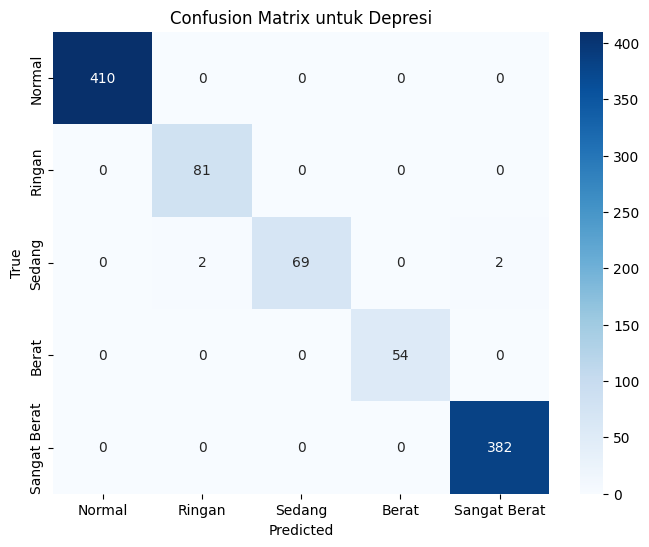

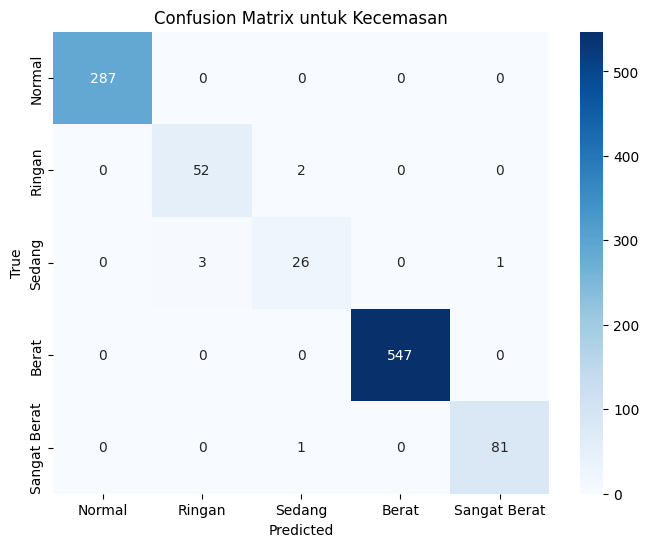

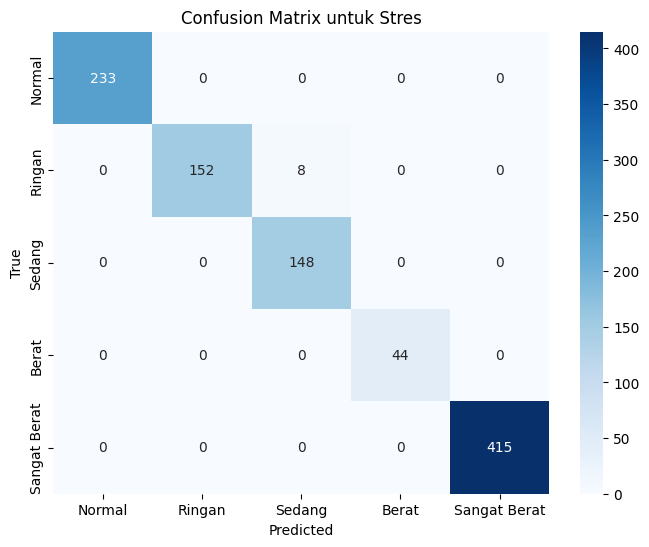

In [ ]:
# Menentukan label
labels = ['Normal', 'Ringan', 'Sedang', 'Berat', 'Sangat Berat']

# Membuat confusion matrix untuk depresi
dp_cm = confusion_matrix(dp_y_test, dp_model.predict(dp_X_test))

# Plot confusion matrix untuk depresi
plt.figure(figsize=(8, 6))
sns.heatmap(dp_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix untuk Depresi")
plt.show()

# Membuat confusion matrix untuk Kecemasan
kc_cm = confusion_matrix(kc_y_test, kc_model.predict(kc_X_test))

# Plot confusion matrix untuk Kecemasan
plt.figure(figsize=(8, 6))
sns.heatmap(kc_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix untuk Kecemasan")
plt.show()

# Membuat confusion matrix untuk Stres
ss_cm = confusion_matrix(ss_y_test, ss_model.predict(ss_X_test))

# Plot confusion matrix untuk Stress
plt.figure(figsize=(8, 6))
sns.heatmap(ss_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix untuk Stres")
plt.show()

In [ ]:
# Mencetak laporan akurasi dan klasifikasi untuk depresi
print("Depression:")
print("Accuracy:", accuracy_score(dp_y_test, dp_model.predict(dp_X_test)))
print("Classification Report:")
print(classification_report(dp_y_test, dp_model.predict(dp_X_test)))

# Mencetak laporan akurasi dan klasifikasi untuk kecemasan
print("\nAnxiety:")
print("Accuracy:", accuracy_score(kc_y_test, kc_model.predict(kc_X_test)))
print("Classification Report:")
print(classification_report(kc_y_test, kc_model.predict(kc_X_test)))

# Mencetak laporan akurasi dan klasifikasi untuk stress
print("\nStress:")
print("Accuracy:", accuracy_score(ss_y_test, ss_model.predict(ss_X_test)))
print("Classification Report:")
print(classification_report(ss_y_test, ss_model.predict(ss_X_test)))

Depression:
Accuracy: 0.996
Classification Report:
              precision    recall  f1-score   support

       Berat       1.00      1.00      1.00       410
      Normal       0.98      1.00      0.99        81
      Ringan       1.00      0.95      0.97        73
Sangat Berat       1.00      1.00      1.00        54
      Sedang       0.99      1.00      1.00       382

    accuracy                           1.00      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000


Anxiety:
Accuracy: 0.993
Classification Report:
              precision    recall  f1-score   support

       Berat       1.00      1.00      1.00       287
      Normal       0.95      0.96      0.95        54
      Ringan       0.90      0.87      0.88        30
Sangat Berat       1.00      1.00      1.00       547
      Sedang       0.99      0.99      0.99        82

    accuracy                           0.99      1000
   macro avg       0.97      0.

# Menyimpan Model

In [ ]:
# Menyimpan model depresi ke file
with open('depresi_model.pkl', 'wb') as f:
    pickle.dump(dp_model, f)

# Menyimpan model kecemasan ke file
with open('kecemasan_model.pkl', 'wb') as f:
    pickle.dump(kc_model, f)

# Menyimpan model stres ke file
with open('stres_model.pkl', 'wb') as f:
    pickle.dump(ss_model, f)

# Menguji Model

In [ ]:
# Memuat model depresi dari file
with open('depresi_model.pkl', 'rb') as f:
    dp_model = pickle.load(f)

# Memuat model kecemasan dari file
with open('kecemasan_model.pkl', 'rb') as f:
    kc_model = pickle.load(f)

# Memuat model stres dari file
with open('stres_model.pkl', 'rb') as f:
    ss_model = pickle.load(f)

# Input data untuk depresi
DASS1 = int(input("Menjadi marah karena hal-hal sepele: "))
DASS6 = int(input("Cenderung bereaksi berlebihan pada situasi lingkungan: "))
DASS8 = int(input("Ada kesulitan untuk rileks atau bersantai: "))
DASS11 = int(input("Mudah merasa kesal: "))
DASS12 = int(input("Merasa banyak menghabiskan energi karena cemas: "))
DASS14 = int(input("Tidak sabaran: "))
DASS18 = int(input("Mudah tersinggung: "))
DASS22 = int(input("Sulit untuk beristirahat: "))
DASS27 = int(input("Mudah marah: "))
DASS29 = int(input("Kesulitan untuk tenang setelah terjadi sesuatu yang mengganggu: "))
DASS32 = int(input("Sulit mentoleransi gangguan-gangguan terhadap hal yang sedang dilakukan: "))
DASS33 = int(input("Berada pada keadaan atau situasi tegang: "))
DASS35 = int(input("Tidak dapat memaklumi hal apapun yang menghalangi untuk menyelesaikan hal yang sedang dilakukan: "))
DASS39 = int(input("Mudah gelisah: "))

# Input data untuk kecemasan
DASS2 = int(input("Mulut terasa kering: "))
DASS4 = int(input("Merasakan gangguan dalam bernafas (nafas cepat, sulit bernafas, sesak): "))
DASS7 = int(input("Ada kelemahan pada anggota tubuh: "))
DASS9 = int(input("Cemas berlebihan dalam suatu situasi namun lega jika situasi itu berakhir: "))
DASS15 = int(input("Merasa Kelelahan: "))
DASS19 = int(input("Berkeringat tanpa pencetus yang jelas (misal: tangan berkeringat): "))
DASS20 = int(input("Ketakutan tanpa alasan yang jelas: "))
DASS23 = int(input("Kesulitan dalam menelan: "))
DASS25 = int(input("Perubahan denyut jantung dan nadi tanpa alasan yang jelas (berdebar): "))
DASS28 = int(input("Mudah panik: "))
DASS30 = int(input("Takut diri terhambat oleh tugas-tugas yang tidak biasa dilakukan: "))
DASS36 = int(input("Merasa Ketakutan: "))
DASS40 = int(input("Merasa khawatir dengan situasi saat diri panik dan mempermalukan diri sendiri: "))
DASS41 = int(input("Gemetar: "))

# Input data untuk stres
DASS3 = int(input("Tidak dapat melihat hal positif dari suatu kejadian: "))
DASS5 = int(input("Merasa sepertinya tidak kuat lagi melakukan kegiatan: "))
DASS10 = int(input("Pesimis: "))
DASS13 = int(input("Merasa sedih atau depresi: "))
DASS16 = int(input("Kehilangan minat pada banyak hal (seperti makan, bergerak, sosialisasi, dll): "))
DASS17 = int(input("Merasa diri tidak layak: "))
DASS21 = int(input("Merasa hidup tidak berharga: "))
DASS24 = int(input("Tidak dapat menikmati hal yang sedang dilakukan: "))
DASS26 = int(input("Merasa hilang harapan dan putus asa: "))
DASS31 = int(input("Sulit untuk antusias pada banyak hal: "))
DASS34 = int(input("Merasa tidak berharga: "))
DASS37 = int(input("Tidak ada harapan untuk masa depan: "))
DASS38 = int(input("Merasa hidup tidak berarti: "))
DASS42 = int(input("Merasa sulit meningkatkan inisiatif dalam melakukan sesuatu: "))

# Membuat daftar data masukan untuk depresi
dp_input_data = [DASS1, DASS6, DASS8, DASS11, DASS12, DASS14, DASS18, DASS22, DASS27, DASS29, DASS32, DASS33, DASS35, DASS39]

# Membuat daftar data masukan untuk kecemasan
kc_input_data = [DASS2, DASS4, DASS7, DASS9, DASS15, DASS19, DASS20, DASS23, DASS25, DASS28, DASS30, DASS36, DASS40, DASS41]

# Membuat daftar data masukan untuk stres
ss_input_data = [DASS3, DASS5, DASS10, DASS13, DASS16, DASS17, DASS21, DASS24, DASS26, DASS31, DASS34, DASS37, DASS38, DASS42]

# Memprediksi kategori depresi
dp_prediction = dp_model.predict([dp_input_data])

# Memprediksi kategori kecemasan
kc_prediction = kc_model.predict([kc_input_data])

# Memprediksi kategori stres
ss_prediction = ss_model.predict([ss_input_data])

# Mencetak prediksi
print("Depression Prediction:", dp_prediction[0])
print("Anxiety Prediction:", kc_prediction[0])
print("Stress Prediction:", ss_prediction[0])


Menjadi marah karena hal-hal sepele: 2
Cenderung bereaksi berlebihan pada situasi lingkungan: 2
Ada kesulitan untuk rileks atau bersantai: 2
Mudah merasa kesal: 2
Merasa banyak menghabiskan energi karena cemas: 2
Tidak sabaran: 2
Mudah tersinggung: 2
Sulit untuk beristirahat: 2
Mudah marah: 2
Kesulitan untuk tenang setelah terjadi sesuatu yang mengganggu: 2
Sulit mentoleransi gangguan-gangguan terhadap hal yang sedang dilakukan: 2
Berada pada keadaan atau situasi tegang: 2
Tidak dapat memaklumi hal apapun yang menghalangi untuk menyelesaikan hal yang sedang dilakukan: 2
Mudah gelisah: 2
Mulut terasa kering: 2
Merasakan gangguan dalam bernafas (nafas cepat, sulit bernafas, sesak): 2
Ada kelemahan pada anggota tubuh: 2
Cemas berlebihan dalam suatu situasi namun lega jika situasi itu berakhir: 2
Merasa Kelelahan: 2
Berkeringat tanpa pencetus yang jelas (misal: tangan berkeringat): 2
Ketakutan tanpa alasan yang jelas: 2
Kesulitan dalam menelan: 2
Perubahan denyut jantung dan nadi tanpa ala

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
